## Importing the Necessary Packages

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
from xgboost import XGBRegressor
import seaborn as sns
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt


sns.set()

## Loading Data

In [4]:
raw_data = pd.read_csv('1.03 STATION KUAKATA.csv')
raw_data.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
0,2018,1,1,101.17,16.10,23.80,2.13,4.23,79.25,16.54,12.484,6.384,-0.9737,-2.8737
1,2018,1,2,101.05,15.77,21.33,1.41,6.40,84.00,16.45,12.600,6.244,-0.8837,-2.8837
2,2018,1,3,101.20,13.13,23.65,0.01,5.70,74.69,14.35,12.634,6.114,-0.7737,-2.9737
3,2018,1,4,101.39,10.70,21.61,0.00,5.47,71.00,12.60,12.724,5.921,-0.5737,-2.9437
4,2018,1,5,101.26,10.73,21.41,0.00,5.91,74.38,10.99,12.834,5.768,-0.6237,-2.9837


## Handling Null Values

In [5]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 0
LOW                  0
dtype: int64

In [6]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2019.500342,6.522930,15.729637,100.809699,21.564278,29.300794,12.626441,5.721786,78.827981,23.092820,10.313081,11.253992,0.750622,-1.304429
std,1.118111,3.449884,8.803105,0.562178,5.412357,3.228865,25.573935,1.965146,10.603391,5.085687,3.545433,5.728337,0.894928,0.741948
min,2018.000000,1.000000,1.000000,99.150000,5.060000,16.630000,0.000000,1.950000,42.120000,9.620000,3.793000,2.200000,-1.573700,-3.163700
25%,2019.000000,4.000000,8.000000,100.370000,17.670000,27.570000,0.000000,4.490000,71.250000,19.230000,6.780000,5.584000,0.226300,-1.623700
50%,2020.000000,7.000000,16.000000,100.870000,23.580000,29.910000,2.410000,5.380000,81.750000,25.540000,11.207000,12.006000,0.966300,-1.230000
75%,2020.000000,10.000000,23.000000,101.280000,26.170000,31.150000,14.820000,6.460000,87.560000,27.190000,13.539000,16.989000,1.380000,-0.780000
max,2021.000000,12.000000,31.000000,101.920000,27.830000,38.510000,303.640000,22.520000,94.190000,28.870000,15.071000,19.062000,3.930000,0.326300


## Distribution Check and Dealing With Outliers

In [7]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


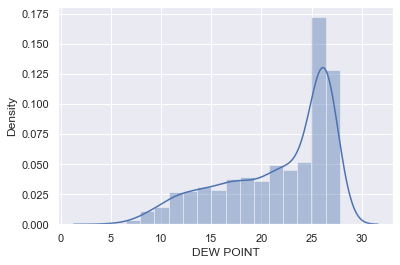

In [8]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


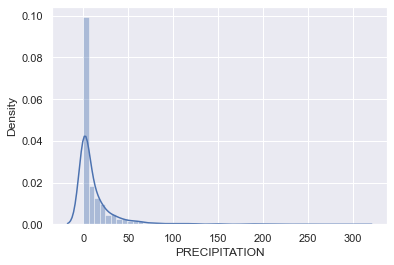

In [9]:
sns.distplot(df['PRECIPITATION'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


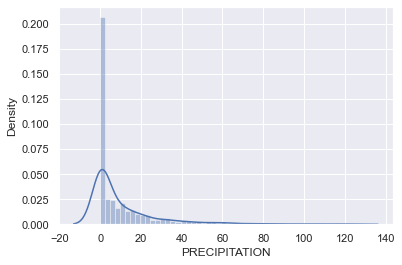

In [10]:
q = df['PRECIPITATION'].quantile(0.99)
data_1 = df[df['PRECIPITATION']<q]
sns.distplot(data_1['PRECIPITATION'])
plt.show()

In [11]:
data_cleaned = data_1.reset_index(drop=True)

In [12]:
data_cleaned = data_cleaned.drop(['LOW'],axis=1)
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,2019.505533,6.511065,15.737898,100.817365,21.512856,29.306328,10.886155,5.687531,78.688091,23.051362,10.335770,11.211770,0.751780
std,1.119644,3.461436,8.814806,0.558582,5.416064,3.243996,18.544403,1.936468,10.567866,5.094700,3.550044,5.738765,0.896841
min,2018.000000,1.000000,1.000000,99.150000,5.060000,16.630000,0.000000,1.950000,42.120000,9.620000,3.793000,2.200000,-1.573700
25%,2019.000000,4.000000,8.000000,100.380000,17.520000,27.562500,0.000000,4.482500,71.190000,19.187500,6.793500,5.539000,0.228800
50%,2020.000000,7.000000,16.000000,100.870000,23.400000,29.945000,2.280000,5.360000,81.620000,25.495000,11.291000,11.877500,0.966300
75%,2021.000000,10.000000,23.000000,101.280000,26.147500,31.180000,14.162500,6.410000,87.500000,27.180000,13.546750,16.988500,1.380000
max,2021.000000,12.000000,31.000000,101.920000,27.830000,38.510000,123.220000,22.520000,94.190000,28.870000,15.071000,19.062000,3.930000


## Setting Targets(Labels) and Inputs

In [13]:
targets = data_cleaned['HIGH']
inputs = data_cleaned.drop(['HIGH'],axis=1)

## Polynomial Regression

### Scaling the data

In [14]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train-Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Model

In [16]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

### Training

In [17]:
reg_pol = LinearRegression()
reg_pol.fit(x_train_trans,y_train)
Train_score_PR = reg_pol.score(x_train_trans,y_train)
print("Training Score: ",Train_score_PR)

Training Score:  0.6640918823004319


### Testing

In [18]:
y_pred_pol = reg_pol.predict(x_test_trans)

In [19]:
Test_score_PR = r2_score(y_test,y_pred_pol)
print("Testing Score: ",Test_score_PR)

Testing Score:  0.5619905895586937


In [20]:
mse = mean_squared_error(y_test, y_pred_pol)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.33654753633132406
RMSE : 0.16827376816566203


### Visulizing Predictions

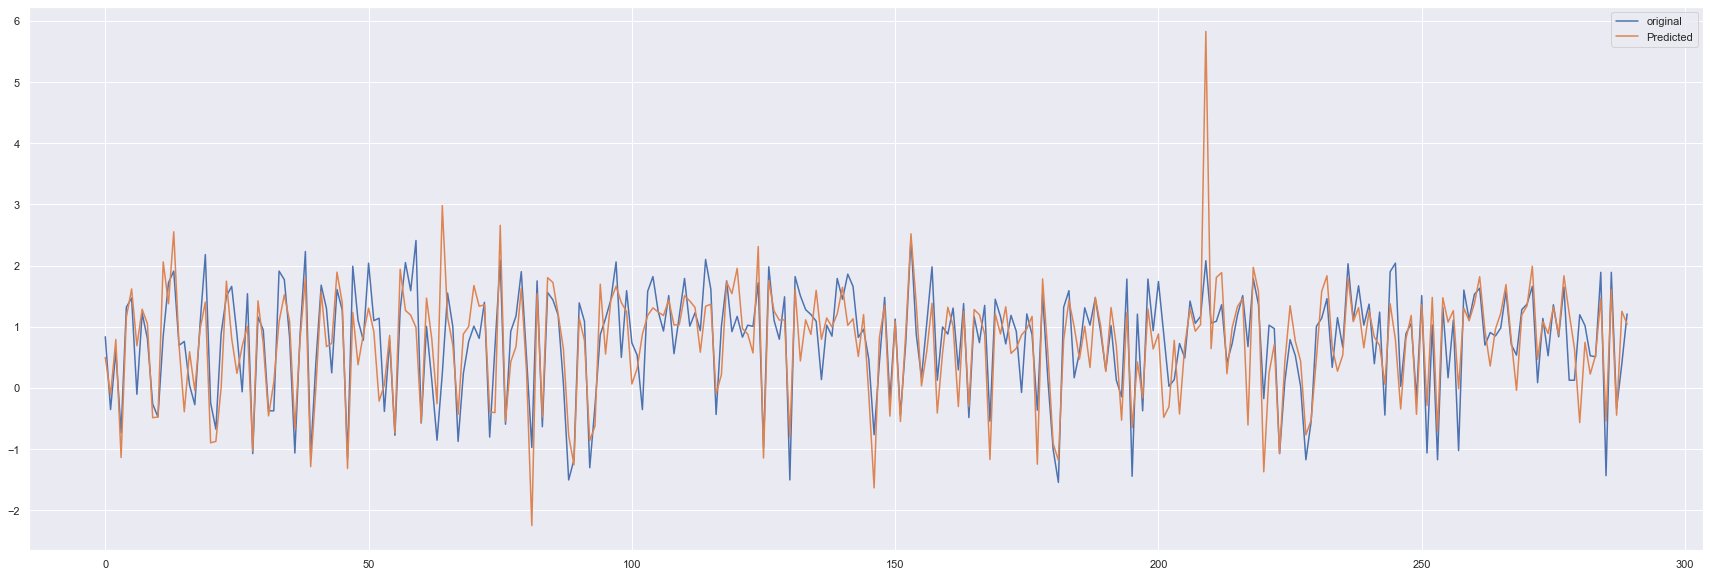

In [21]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_pol, label="Predicted")
plt.legend()
plt.show()


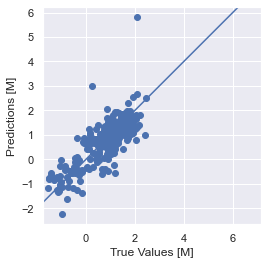

In [22]:
y_pred_pol = reg_pol.predict(x_test_trans).flatten()
plt.scatter(y_test, y_pred_pol)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## Support Vector Regression

### Scaling the data

In [23]:
df_svr = data_cleaned
scaler=MinMaxScaler()
scaler.fit(inputs)
inputs_scaled_SVR = scaler.transform(inputs)

### Train-Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled_SVR, targets, test_size=0.2, random_state=22)

### Model and Training

In [25]:
svr = SVR(kernel='rbf',C=70,epsilon=0.1)
svr.fit(x_train,y_train)
Train_score_SVR = svr.score(x_train,y_train)
print("Training Score: ",Train_score_SVR)

Training Score:  0.9325353043423511


### Testing

In [26]:
y_pred_svr = svr.predict(x_test)

In [27]:
Test_score_SVR = r2_score(y_test,y_pred_svr)
print("Testing Score: ",Test_score_SVR)

Testing Score:  0.8690054168425572


In [28]:
mse = mean_squared_error(y_test, y_pred_svr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.10770495654581616
RMSE : 0.05385247827290808


### Visualizing Predictions

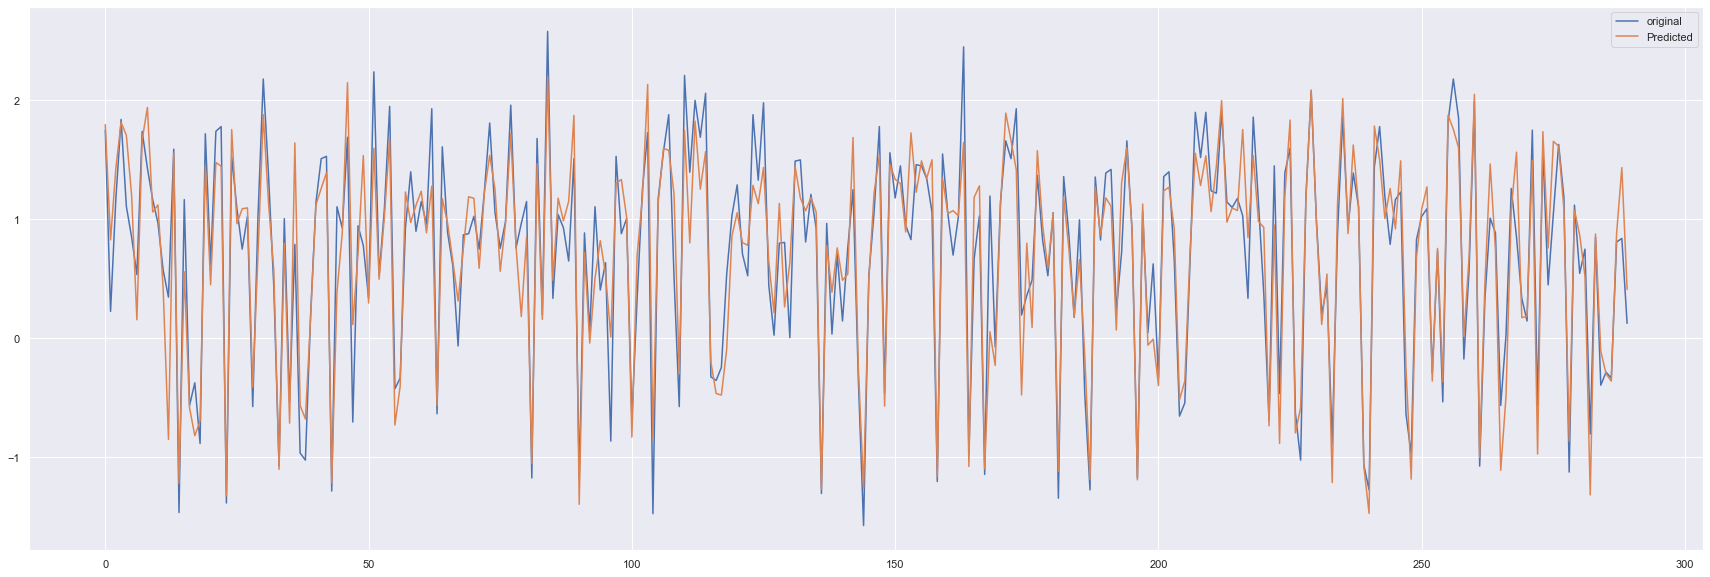

In [29]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_svr, label="Predicted")
plt.legend()
plt.show()

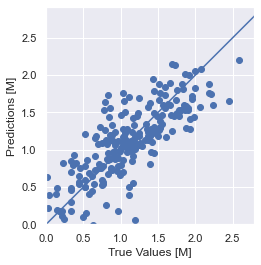

In [30]:
y_pred_svr = svr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_svr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## XGB Regressor

### Train-Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.15, random_state=22)

### Model

In [32]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


### Training

In [33]:
xgbr.fit(x_train,y_train)
Train_score_XGB = xgbr.score(x_train,y_train)
print("Training Score: ",Train_score_XGB)

Training Score:  0.9993611126155841


### Testing

In [34]:
y_pred_xgbr = xgbr.predict(x_test)
Test_score_XGB =  r2_score(y_test,y_pred_xgbr)
print("Testing Score: ",Test_score_XGB)

Testing Score:  0.9050807082392907


In [35]:
mse = mean_squared_error(y_test, y_pred_xgbr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.07639468550045699
RMSE : 0.03819734275022849


### Visualizing Predictions

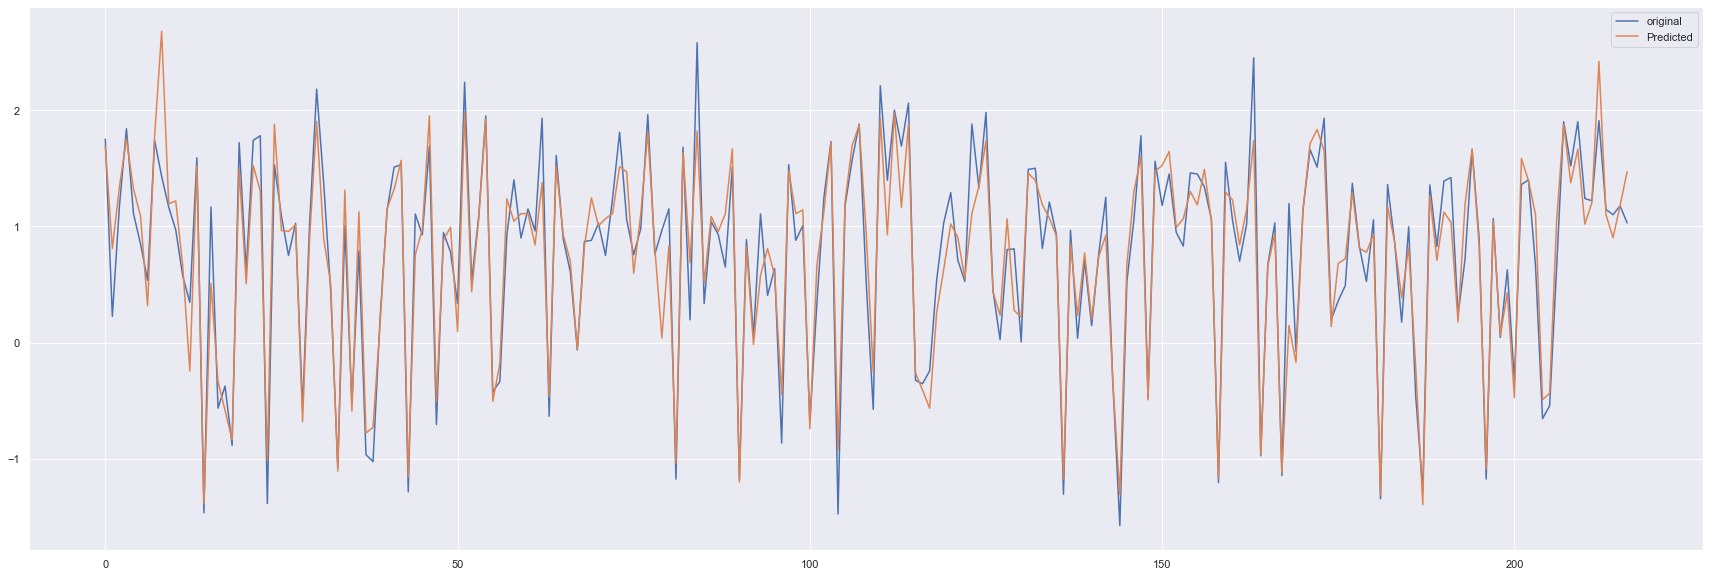

In [36]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_xgbr, label="Predicted")
plt.legend()
plt.show()

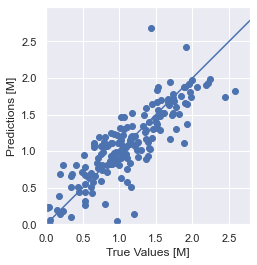

In [37]:
y_pred_xgbr = xgbr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_xgbr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## Random Forest Regression Model

### Train-Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=22)

### Model

In [39]:
rfr = RandomForestRegressor(n_estimators=500,random_state=0)

### Training

In [40]:
rfr.fit(x_train,y_train)
Train_score_RFR = rfr.score(x_train,y_train)
print("Training Score: ",Train_score_RFR)

Training Score:  0.9885069057920461


### Testing

In [41]:
y_pred_rfr = rfr.predict(x_test)
Test_score_RFR =  r2_score(y_test,y_pred_rfr)
print("Testing Score: ",Test_score_RFR)

Testing Score:  0.9054340837152898


In [42]:
mse = mean_squared_error(y_test, y_pred_rfr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.07775297007448276
RMSE : 0.03887648503724138


### Visualizing Predictions

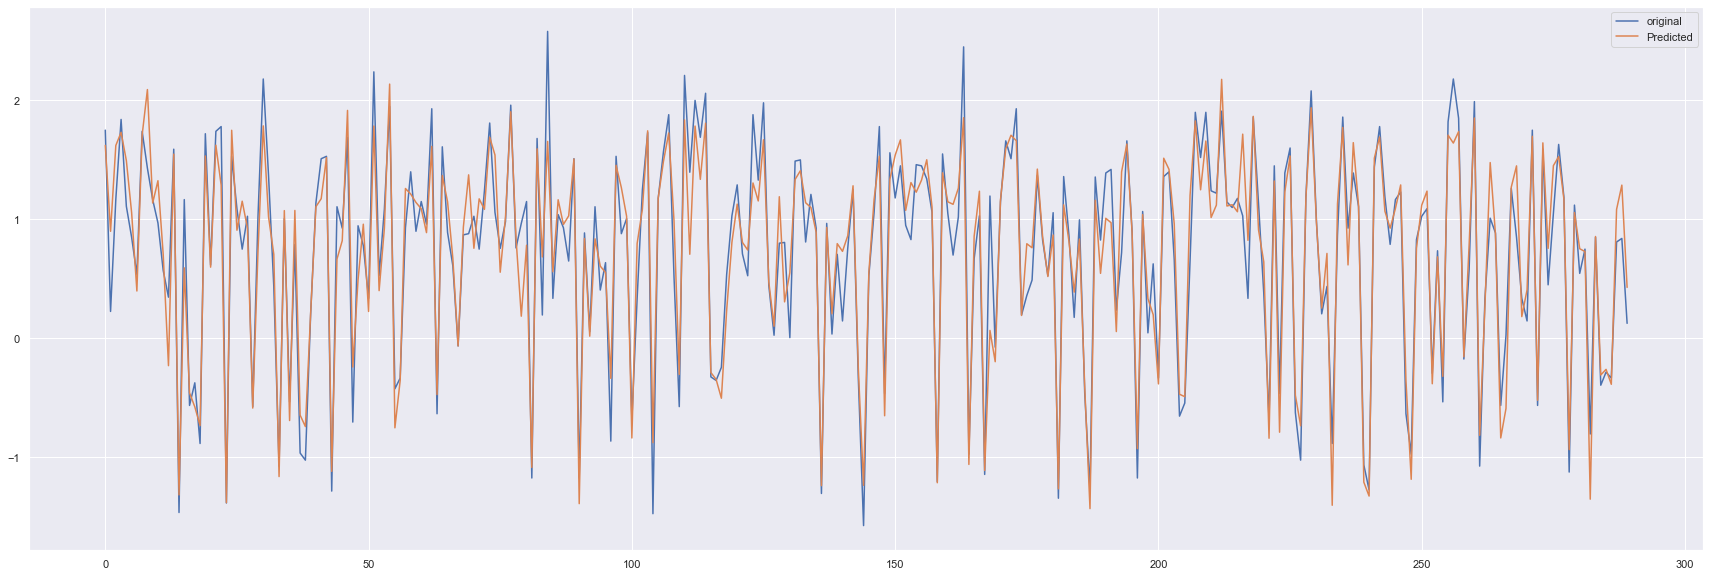

In [43]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_rfr, label="Predicted")
plt.legend()
plt.show()

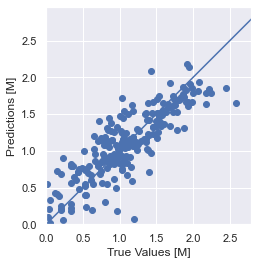

In [44]:
y_pred_rfr = rfr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_rfr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()